Train shape: (18306, 17)
Test shape: (4152, 17)
Sample submission shape: (450, 2)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


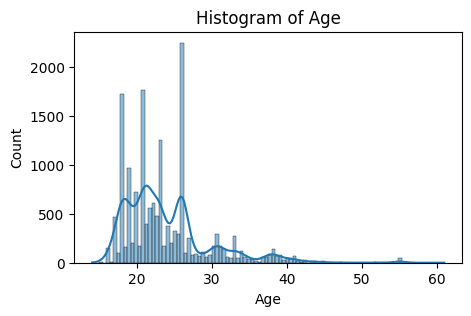

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


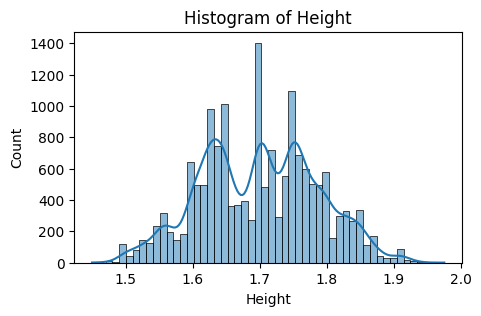

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


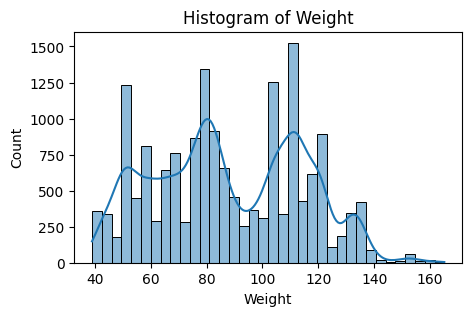

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


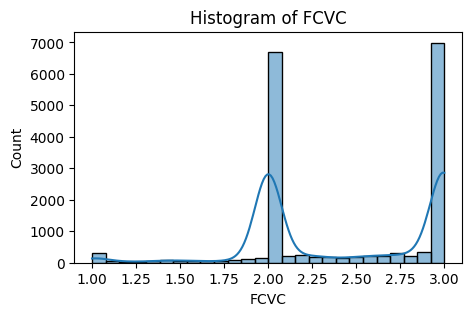

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


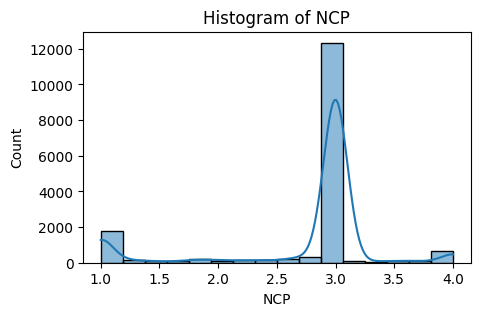

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


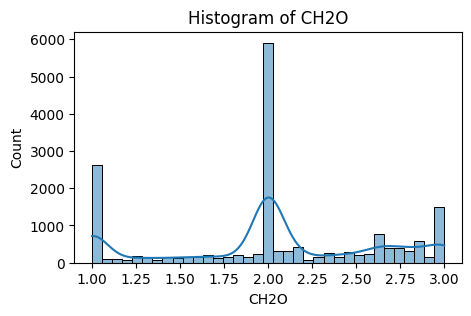

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


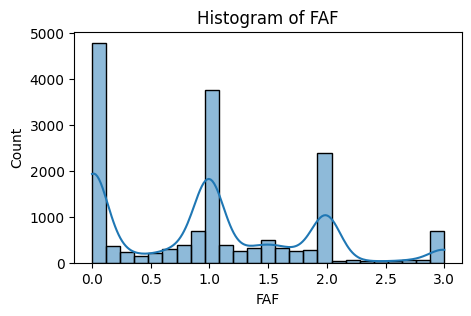

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


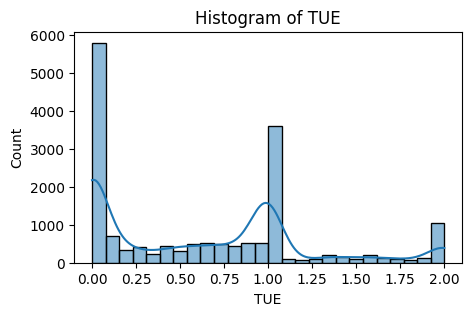

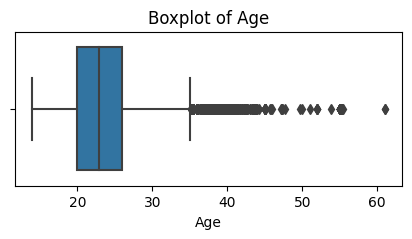

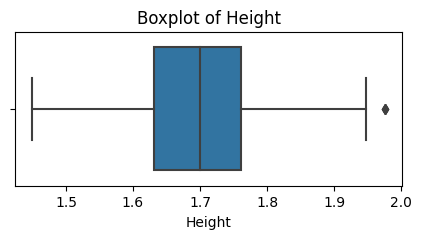

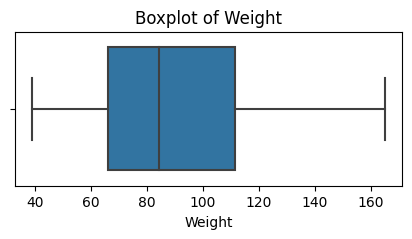

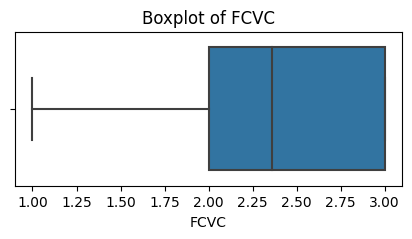

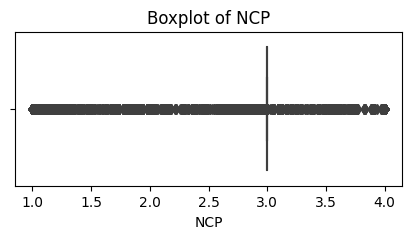

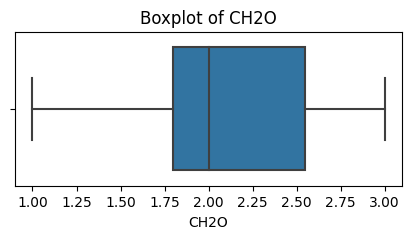

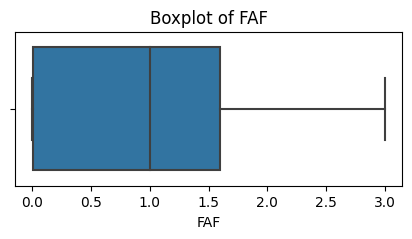

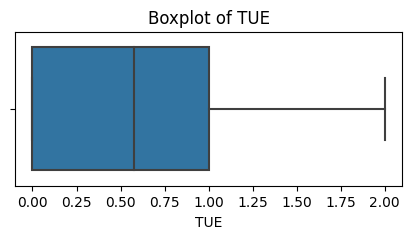

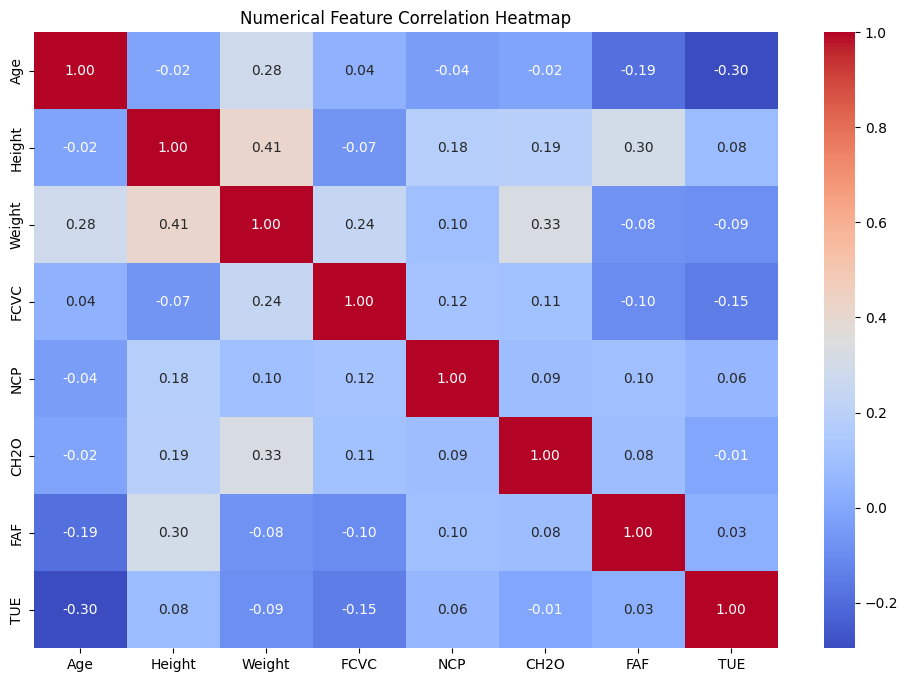

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: Ru


Training XGBoost ...
===== XGBoost =====
Accuracy: 0.8956854178044784
LogLoss : 0.3004598538021286

Training LightGBM ...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1824
[LightGBM] [Info] Number of data points in the train set: 14644, number of used features: 29
[LightGBM] [Info] Start training from score -2.112486
[LightGBM] [Info] Start training from score -1.906542
[LightGBM] [Info] Start training from score -1.951182
[LightGBM] [Info] Start training from score -1.861611
[LightGBM] [Info] Start training from score -1.637765
[LightGBM] [Info] Start training from score -2.131871
[LightGBM] [Info] Start training from score -2.120992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [1]:
# ============================================
# UNIVERSAL KAGGLE ML PIPELINE (Classification)
# Auto Model Selection + Imputer + Label Encode
# 100% Stable for ANY Dataset
# ============================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------
# LOAD DATASETS
# -----------------------------------------------
train_df = pd.read_csv("/kaggle/input/ai-201-b-mse-2-ai-d/train.csv")
test_df = pd.read_csv("/kaggle/input/ai-201-b-mse-2-ai-d/test.csv")
sample_submission = pd.read_csv("/kaggle/input/ai-201-b-mse-2-ai-d/sample_submission.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Sample submission shape:", sample_submission.shape)

# -----------------------------------------------
# ================= DATA VISUALIZATION =================
# -----------------------------------------------
target = train_df.columns[-1]

num_cols_viz = train_df.select_dtypes(include=np.number).columns.tolist()
num_cols_viz = [c for c in num_cols_viz if c != target]

# Histograms
for col in num_cols_viz:
    plt.figure(figsize=(5,3))
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots
for col in num_cols_viz:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=train_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train_df[num_cols_viz].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Feature Correlation Heatmap")
plt.show()

# -----------------------------------------------
# TARGET (last column)
# -----------------------------------------------
X = train_df.drop(columns=[target])

# Encode target
le = LabelEncoder()
y = le.fit_transform(train_df[target])

# Test data
X_test_final = test_df.copy()

# -----------------------------------------------
# ================= OUTLIER HANDLING (IQR) =================
# -----------------------------------------------
num_cols_out = X.select_dtypes(include=np.number).columns
num_cols_out = num_cols_out.drop("id", errors="ignore")

for col in num_cols_out:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X[col] = np.where(X[col] < lower, lower, X[col])
    X[col] = np.where(X[col] > upper, upper, X[col])

    if col in X_test_final.columns:
        X_test_final[col] = np.where(X_test_final[col] < lower, lower, X_test_final[col])
        X_test_final[col] = np.where(X_test_final[col] > upper, upper, X_test_final[col])

# -----------------------------------------------
# TRAIN–VALIDATION SPLIT
# -----------------------------------------------
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------------------------
# DETECT COLUMN TYPES
# -----------------------------------------------
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# -----------------------------------------------
# PREPROCESSOR (Impute + OneHot + Scale)
# -----------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),

        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ]), num_cols),
    ]
)

# -----------------------------------------------
# MODELS
# -----------------------------------------------
models = {
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=-1,
        n_jobs=-1
    ),
    "CatBoost": CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=6,
        verbose=0,
        thread_count=-1
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        n_jobs=-1
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=2000,
        n_jobs=-1
    )
}

# -----------------------------------------------
# MODEL TRAINING LOOP
# -----------------------------------------------
best_model = None
best_logloss = np.inf
best_acc = 0.0
best_name = ""

for name, model in models.items():
    print(f"\nTraining {name} ...")

    pipe = Pipeline([
        ("pre", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)

    preds = pipe.predict(X_valid)
    prob = pipe.predict_proba(X_valid)

    acc = accuracy_score(y_valid, preds)
    ll = log_loss(y_valid, prob)

    print(f"===== {name} =====")
    print("Accuracy:", acc)
    print("LogLoss :", ll)

    if ll < best_logloss:
        best_logloss = ll
        best_acc = acc
        best_model = pipe
        best_name = name

# -----------------------------------------------
# BEST MODEL
# -----------------------------------------------
print("\n===============================")
print(" BEST MODEL SELECTED AUTOMATICALLY ")
print("===============================")
print("Model      :", best_name)
print("Accuracy   :", best_acc)
print("LogLoss    :", best_logloss)

# -----------------------------------------------
# FINAL PREDICTIONS
# -----------------------------------------------
final_preds = best_model.predict(X_test_final)

# -----------------------------------------------
# SAFE SUBMISSION (matches test.csv rows)
# -----------------------------------------------
submission = pd.DataFrame()

id_col = sample_submission.columns[0]

if id_col in test_df.columns:
    submission[id_col] = test_df[id_col]
else:
    submission[id_col] = np.arange(len(test_df))

submission[target] = le.inverse_transform(final_preds)

submission.to_csv("submission_final.csv", index=False)
print("\nsubmission_final.csv saved!")
print(submission.head())